In [1]:
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt

In [2]:
def balls_and_bags(balls, bags, states=None):

    # init:
    if states is None:
        states=[bags]
    
    # finish:
    if len(balls) == 0:
        return(states)
    
    # main:
    ball = balls.pop(0)
    nstates = []
    for state in states:
        state_len = len(state)
        nstates.extend([[state[j][:] for j in range(i)]
                       + [state[i][:]+[ball]]
                       + [state[j] for j in range(i+1, state_len)] 
                       for i in range(state_len)])
    return(balls_and_bags(balls, bags, states=nstates))

In [3]:
balls = ["a", "b", "c", "d"]
bags = [[],[],[],[]]
omega = balls_and_bags(balls[:], bags[:])
len(omega)

256

In [4]:
three_in_one = [state for state in omega
                if len(state[-1]) == len(balls)-1]
all_in_one = [state for state in omega
              if len(state[-1]) == len(balls)]

all_in_any = [state for state in omega
                if any([len(state[i]) == len(balls)
                        for i, _ in enumerate(state)])]
three_in_any = [state for state in omega
                if any([len(state[i]) == len(balls)-1
                        for i, _ in enumerate(state)])]

In [5]:
print(len(three_in_one), len(all_in_one), len(omega))
print((len(three_in_one) + len(all_in_one))/len(omega))
print(len(three_in_any), len(all_in_any), len(omega))
print((len(three_in_any) + len(all_in_any))/len(omega))

12 1 256
0.05078125
48 4 256
0.203125


In [6]:
balls = ["a", "b", "c", "d", "e", "f", "j", "h", "g"]
bags = [[],[],[],[]]
omega = balls_and_bags(balls[:], bags[:])
len(omega)

262144

In [7]:
4**9

262144

In [ ]:
three_in_one = [state for state in omega
                if len(state[0]) == len(state[1])==len(state[2])==2
                   or len(state[1]) == len(state[2])==len(state[3])==2
                   or len(state[0]) == len(state[2])==len(state[3])==2
                   or len(state[0]) == len(state[1])==len(state[3])==2]

### Sampling

In [22]:
def sum_dist(N, data=None):
    if data is None:
        xdist = dist.Bernoulli(0.5*torch.ones(1))
    # data = torch.cat([torch.unsqueeze(coin.sample(),0) for i in range(100)],0)
    # (-1 * torch.ones(10)).pow(coin.sample()).sum()
    s = torch.tensor([0])
    
    for i in range(N):
        
        if data is None:
            sample = xdist.sample()
        else:
            sample = torch.tensor([data[i]])
            # print(sample)
        s = torch.cat((s, s[-1]+torch.tensor(-1).pow(sample)), 0)
        
    return(s)
res = sum_dist(30)
res

tensor([  0.,  -1.,   0.,  -1.,   0.,  -1.,  -2.,  -1.,  -2.,  -1.,  -2.,  -1.,
         -2.,  -3.,  -4.,  -5.,  -6.,  -5.,  -6.,  -7.,  -6.,  -7.,  -6.,  -7.,
         -6.,  -7.,  -8.,  -9., -10., -11., -12.])

In [5]:
dist.Categorical(
                1/6*torch.ones((10, 3, 6))).sample()

tensor([[1, 2, 0],
        [1, 4, 4],
        [1, 4, 0],
        [1, 4, 2],
        [3, 4, 0],
        [5, 2, 5],
        [1, 5, 3],
        [3, 0, 4],
        [0, 2, 0],
        [1, 1, 5]])

In [15]:
def sum_dist_dices(N, dices_count):
    return(dist.Categorical(
                1/6*torch.ones((N, dices_count, 6))).sample()
           + torch.ones((N, dices_count)))
res = sum_dist_dices(30, 2)
res.sum(1).fmod(2)

tensor([1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
        0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.])

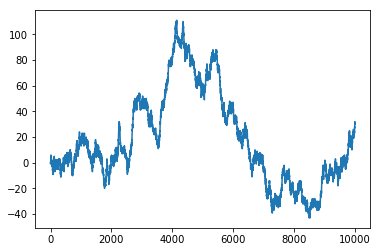

In [23]:
dices = sum_dist(10000, data=sum_dist_dices(10000, 2).sum(1).fmod(2))
plt.plot(dices)
plt.show()

In [59]:
res = sum_dist(1000)

In [60]:
%matplotlib
plt.plot(res)

Using matplotlib backend: Qt5Agg
